In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [4]:
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [6]:
X_train.shape

(60000, 28, 28)

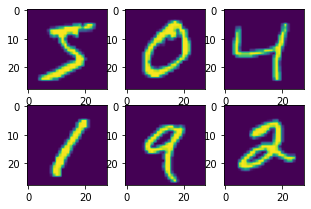

In [9]:
from matplotlib import pyplot as plt

plt.figure(figsize=(5,5))

for k in range(6):
    plt.subplot(3,3, k+1)
    plt.imshow(X_train[k])
    
plt.show()

In [10]:
X_train.shape

(60000, 28, 28)

In [12]:
X_train.max()

255

In [13]:
X_train.min()

0

In [14]:
X_test.shape

(10000, 28, 28)

In [15]:
X_train = X_train/255.0
X_test = X_test/255.0

In [19]:
X_train.shape[1:]

(28, 28)

In [38]:
def build_model():
    model = Sequential()
    model.add(LSTM(128, input_shape=(X_train.shape[1:]), activation='relu', return_sequences=True))
    model.add(Dropout(0.2))
    
    model.add(LSTM(128, activation='relu'))
    model.add(Dropout(0.2))
    
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    
    model.add(Dense(32, activation='softmax'))
    
    
    return model
    

In [37]:
model = build_model()
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 28, 128)           80384     
                                                                 
 dropout_10 (Dropout)        (None, 28, 128)           0         
                                                                 
 lstm_8 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_11 (Dropout)        (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 32)                4128      
                                                                 
 dropout_12 (Dropout)        (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 32)               

In [41]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3, decay=1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [42]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 77s 36ms/step - loss: 3.6439 - accuracy: 0.4610 - val_loss: 1.0644 - val_accuracy: 0.7487
Epoch 2/3
1875/1875 [==============================] - 68s 36ms/step - loss: 2.7046 - accuracy: 0.6290 - val_loss: 0.8544 - val_accuracy: 0.8463
Epoch 3/3
1875/1875 [==============================] - 73s 39ms/step - loss: 1.9664 - accuracy: 0.7135 - val_loss: 0.7319 - val_accuracy: 0.9267
